In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from scipy import stats

In [3]:
## Data Ingestions step
df=pd.read_csv('data/gemstone.csv')
df.head()

id  carat        cut color clarity  depth  table     x     y     z  price
0   0   1.52    Premium     F     VS2   62.2   58.0  7.27  7.33  4.55  13619
1   1   2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12  5.05  13387
2   2   0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73  3.50   2772
3   3   0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41  2.71    666
4   4   1.70    Premium     G     VS2   62.6   59.0  7.65  7.61  4.77  14453

Data Cleaning
1.Initial Inspection
2.Handling Missing Values
3.Removing Duplicates
4.Outlier Detection
5.Data Type Conversion

In [4]:
df.shape

(193573, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [6]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

No missing values present in the data

In [7]:
## Lets drop the id column
df=df.drop(labels=['id'],axis=1)
df.head()

carat        cut color clarity  depth  table     x     y     z  price
0   1.52    Premium     F     VS2   62.2   58.0  7.27  7.33  4.55  13619
1   2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12  5.05  13387
2   0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73  3.50   2772
3   0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41  2.71    666
4   1.70    Premium     G     VS2   62.6   59.0  7.65  7.61  4.77  14453

In [8]:
## check for duplicated records
df.duplicated().sum()

0

**Points to notice:**

Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points.

In [9]:
#Dropping dimentionless diamonds
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(193563, 10)

We lost 10 data points by deleting the dimensionless(2-D or 1-D) diamonds.

**Pairplot Of Data**

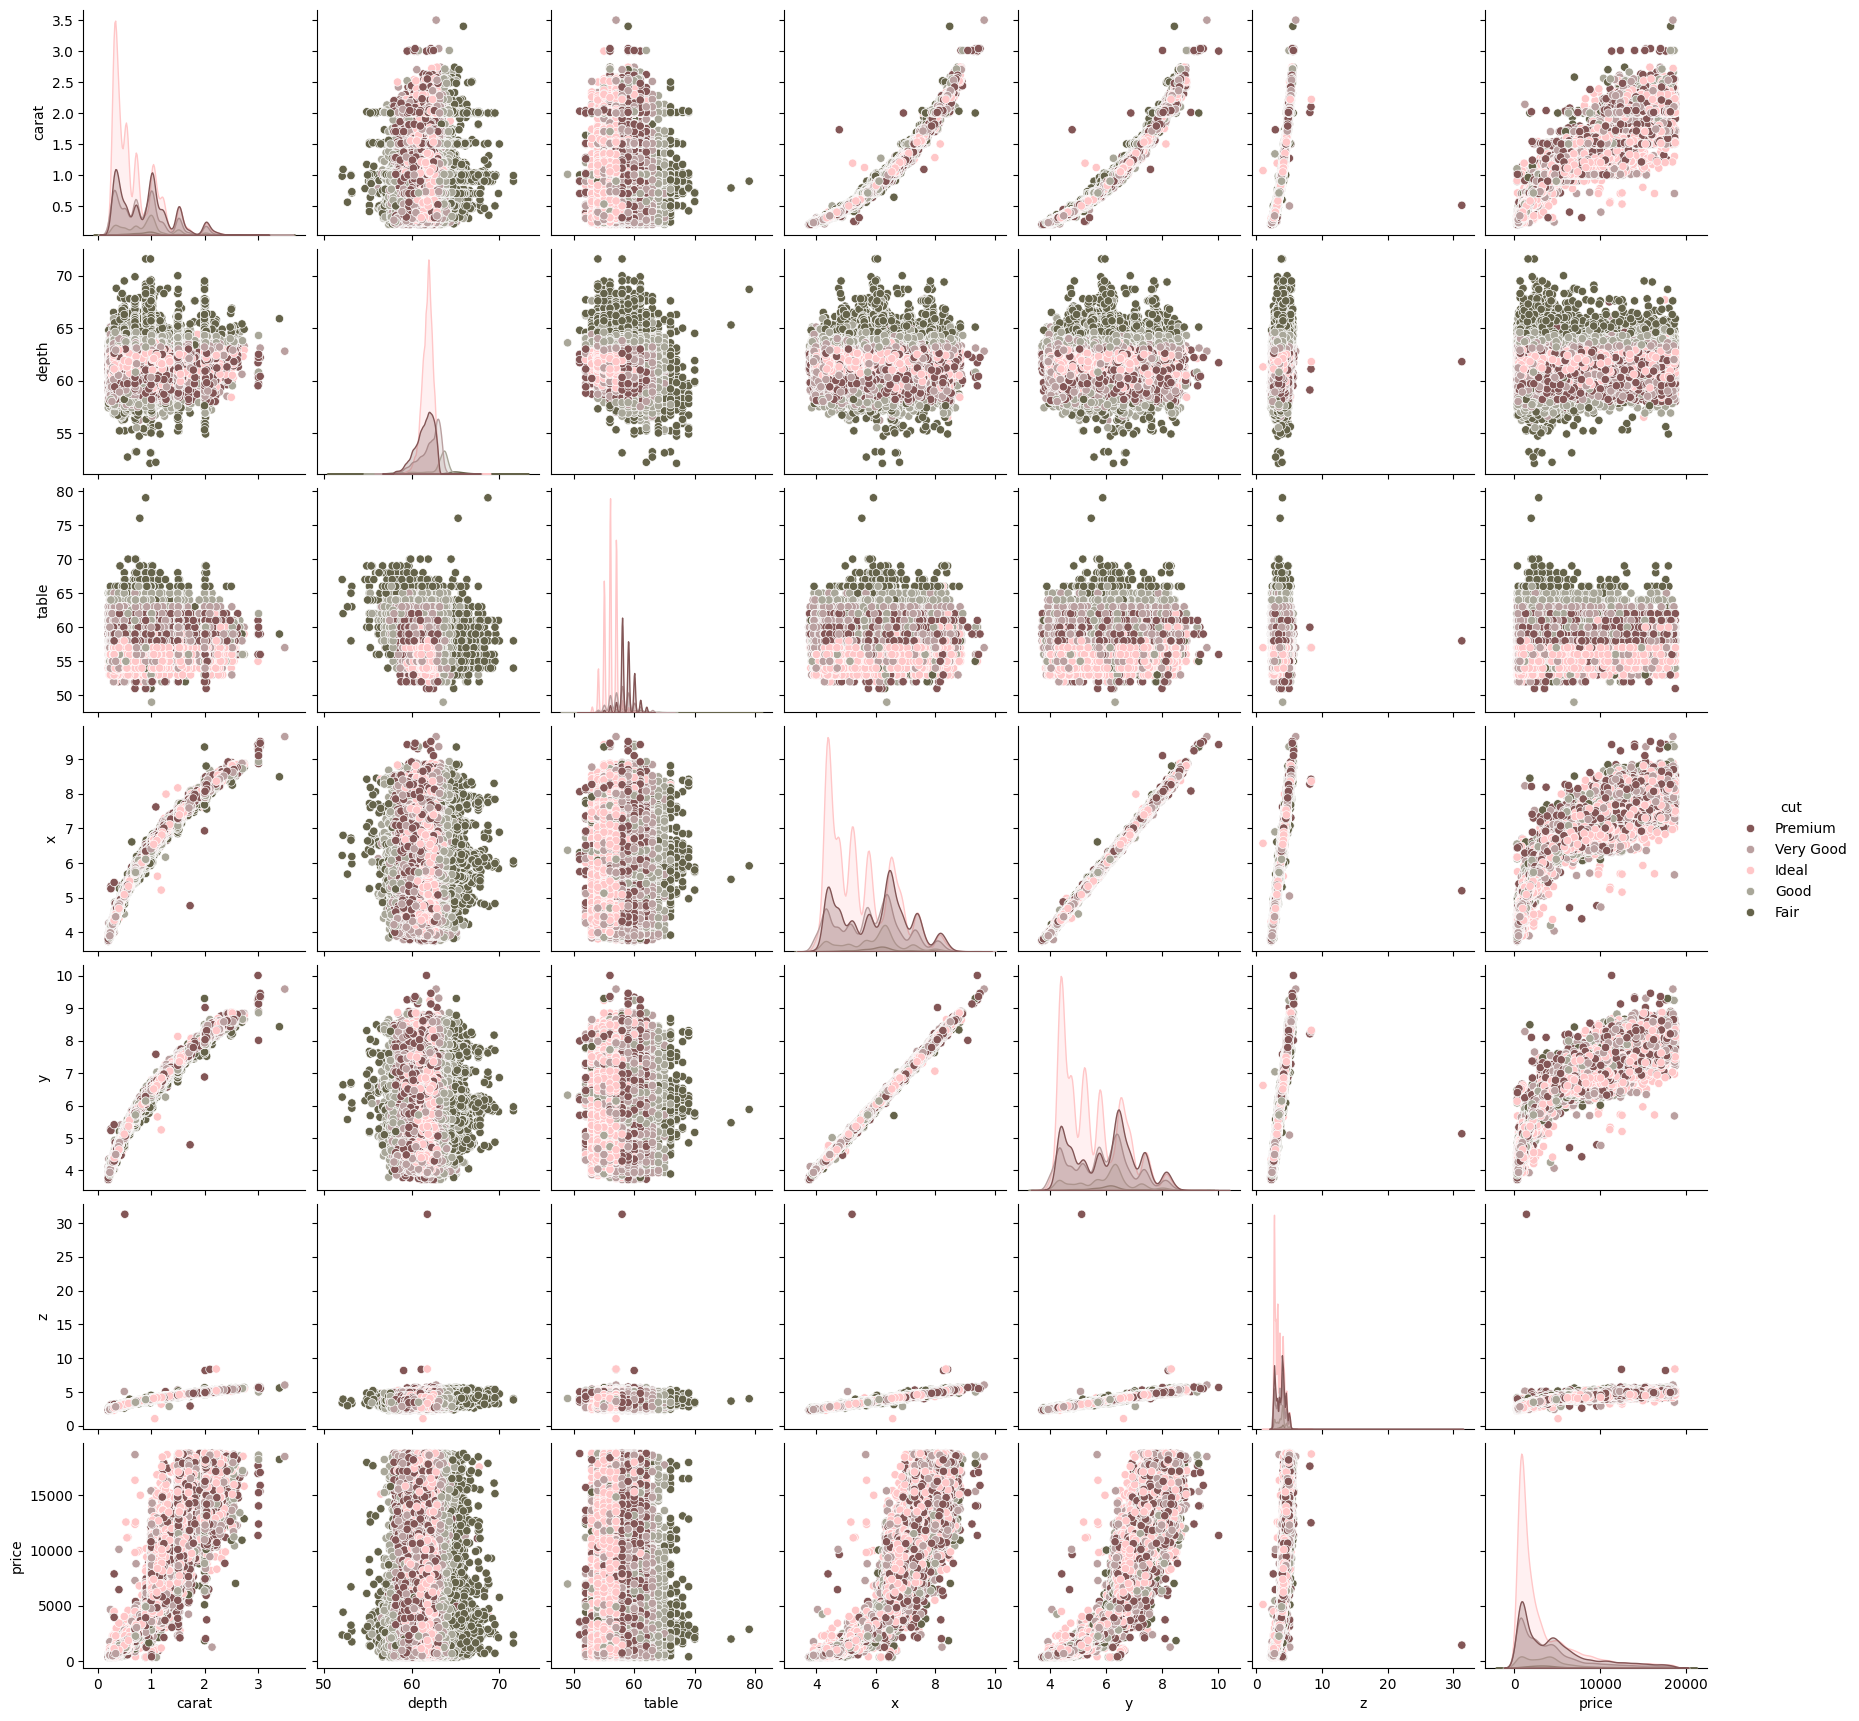

In [13]:
#Let's have a look at data 
shade = ["#835656", "#baa0a0", "#ffc7c8", "#a9a799", "#65634a"]#shades for hue
ax = sns.pairplot(df, hue= "cut",palette=shade)# I chose "cut" as hue. We can also examine other attributes in hue with less value count. 

**A few points to notice in these pair plots**

There are some features with datapoint that are far from the rest of the dataset which will affect the outcome of our regression model.

* "y" and "z" have some dimensional outlies in our dataset that needs to be eliminated.
* The "depth" should be capped but we must examine the regression line to be sure.
* The "table" featured should be capped too.
* Let's have a look at regression plots to get a close look at the outliers.

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

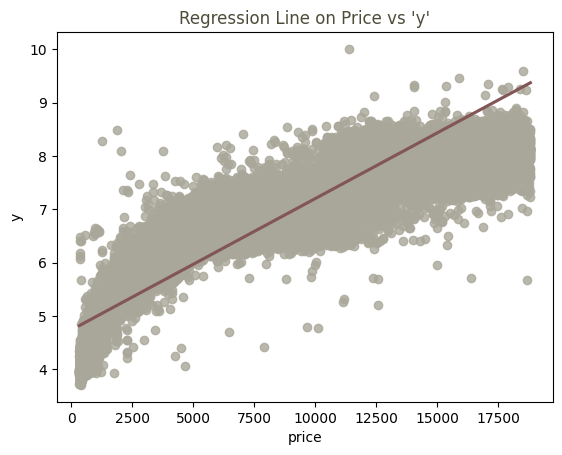

In [10]:
ax = sns.regplot(x="price", y="y", data=df, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'y'", color="#4e4c39")

Text(0.5, 1.0, "Regression Line on Price vs 'z'")

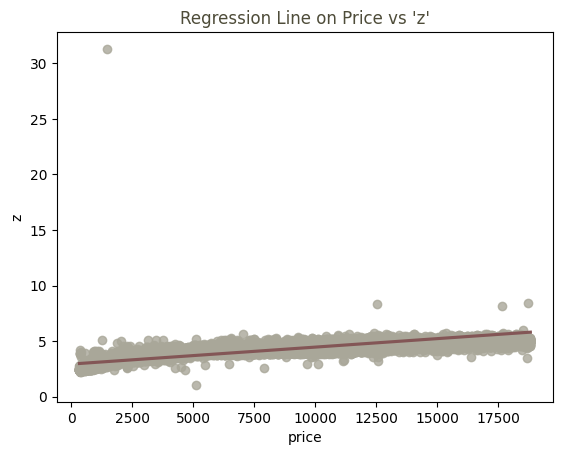

In [11]:
ax= sns.regplot(x="price", y="z", data=df, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'z'", color="#4e4c39")

Text(0.5, 1.0, 'Regression Line on Price vs Depth')

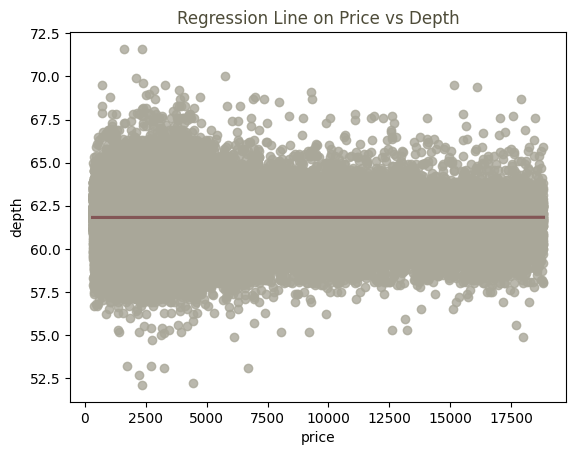

In [12]:
ax= sns.regplot(x="price", y="depth", data=df, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs Depth", color="#4e4c39")

Text(0.5, 1.0, 'Regression Line on Price vs Table')

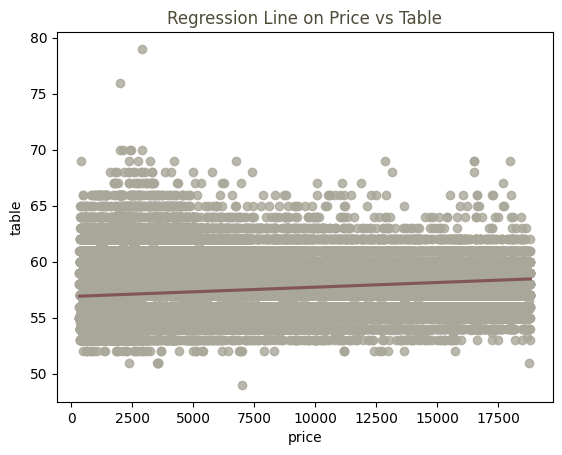

In [13]:
ax=sns.regplot(x="price", y="table", data=df, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs Table", color="#4e4c39")

In [14]:
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df.shape

(193561, 10)

We can clearly spot outliers in these attributes. Next up, we will remove these data points.Now that we have removed regression outliers, let us have a look at the pair plot of data in our hand.

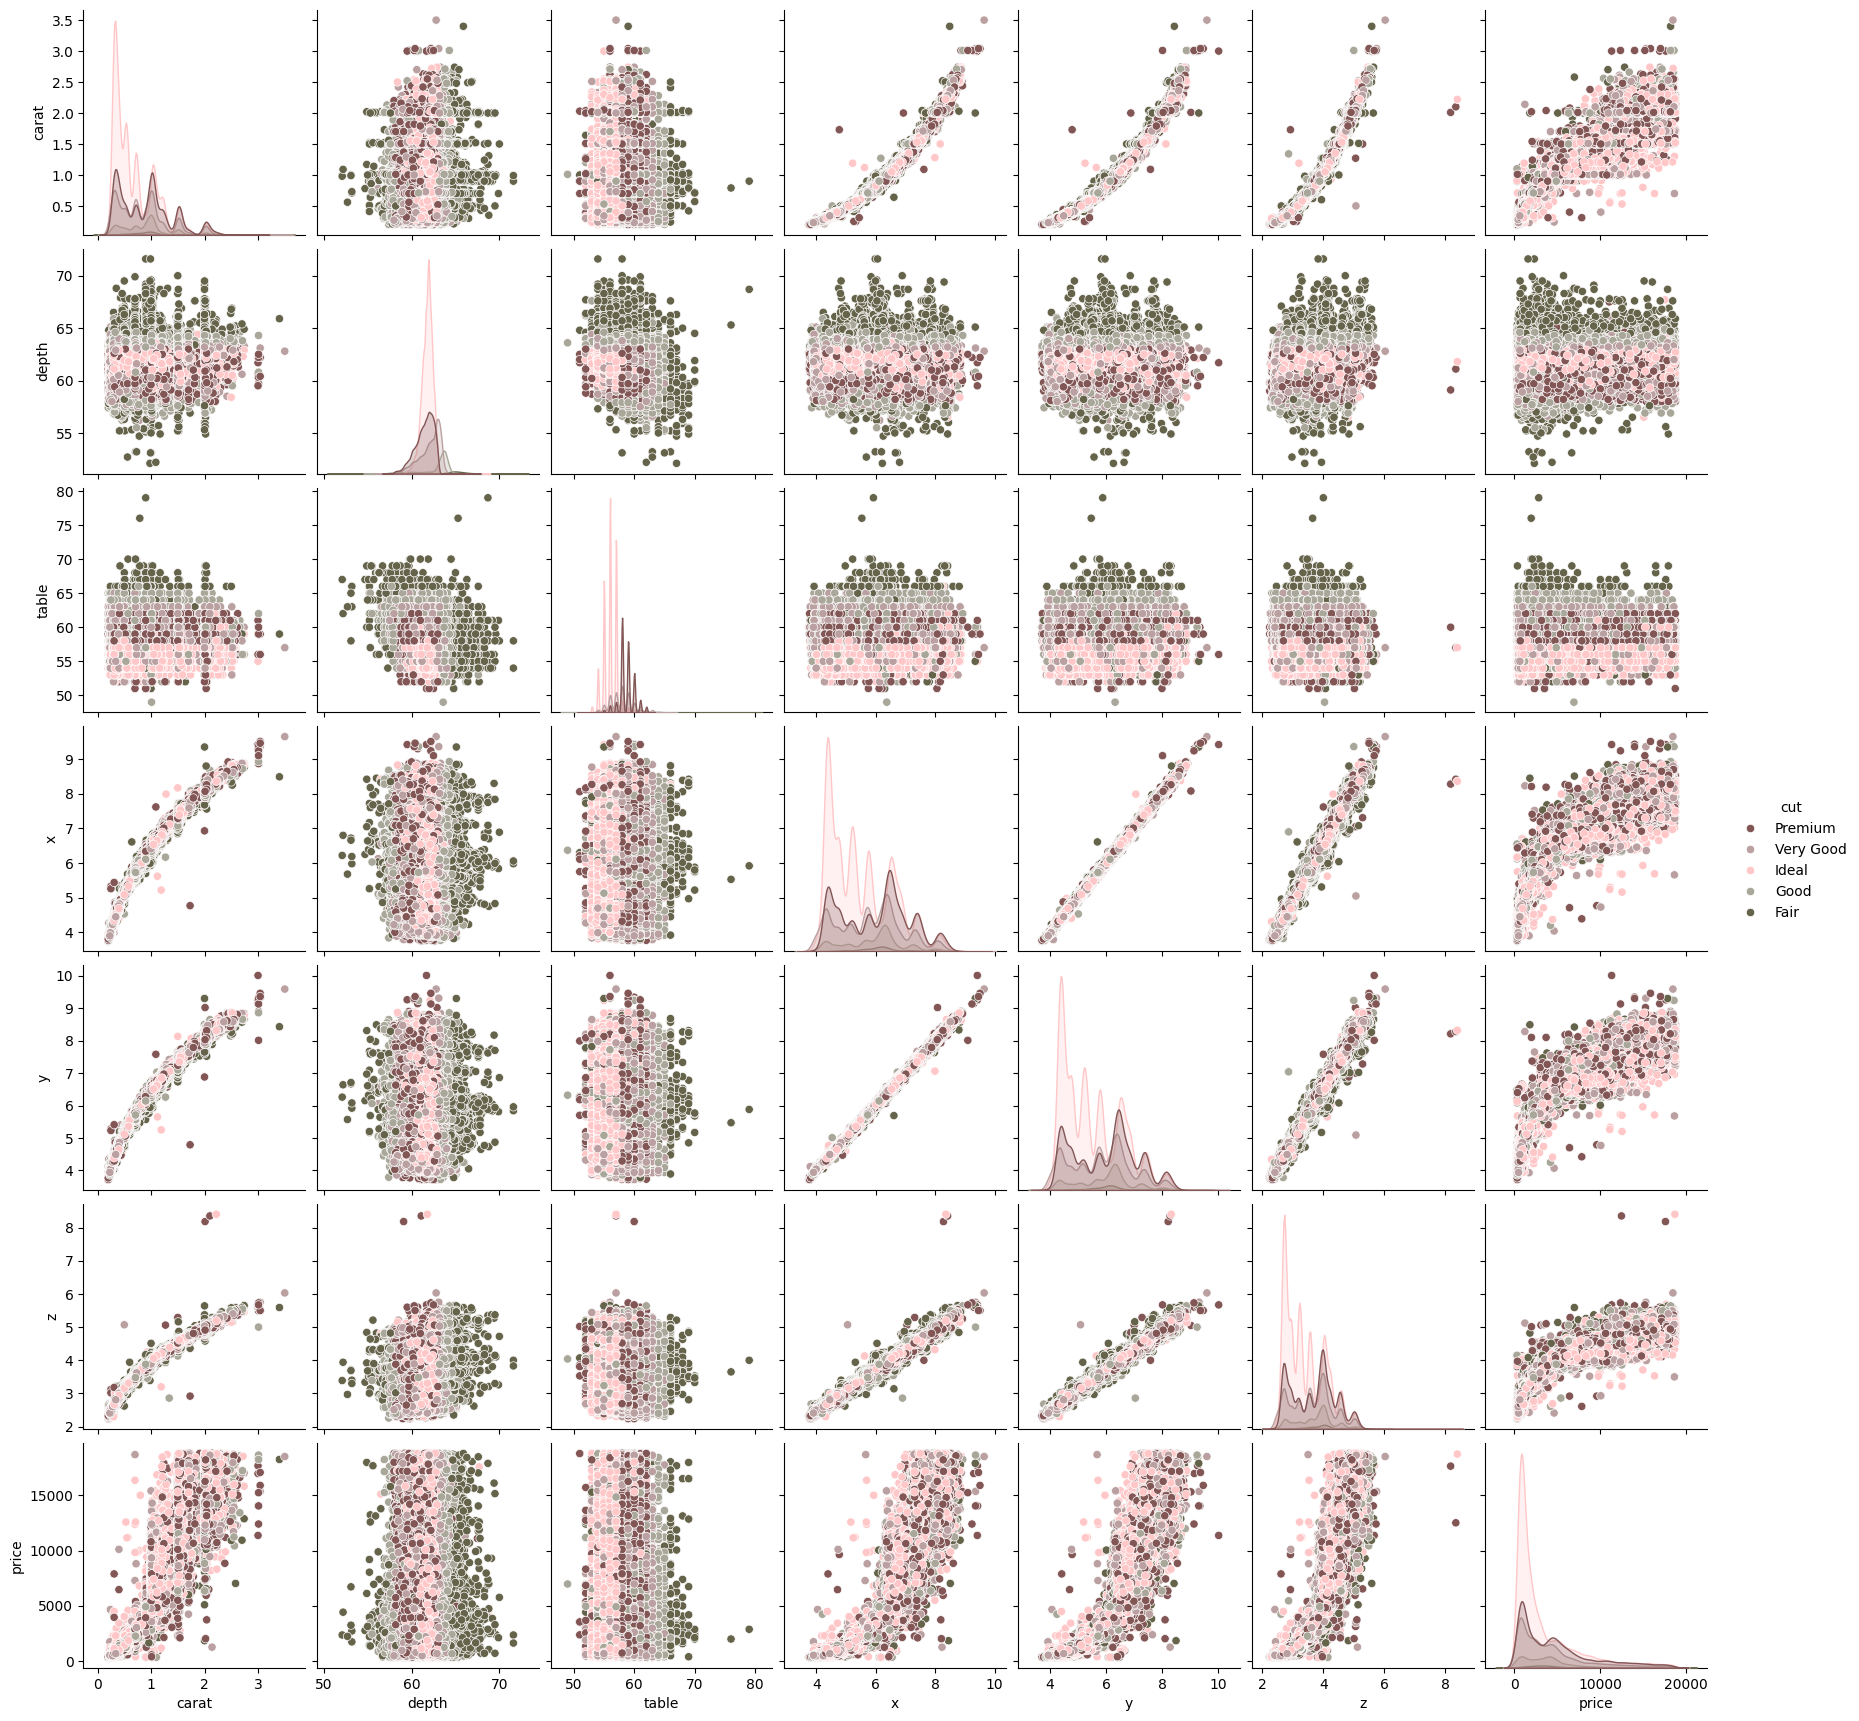

In [18]:
ax=sns.pairplot(df, hue= "cut",palette=shade)

Data Preprocessing
1.Normalization/Standardization
2.Encoding Categorical Variables
3.Feature Engineering
4.Data Splitting
5.Final Review
6.Documentation

That's a much cleaner dataset. 
Next, we will deal with the categorical variables. 

In [15]:
# Get list of categorical variables
s = (df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


We have three categorical variables. 
Let us have a look at them.

In [17]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="cut",y="price", data=df, palette=shade,scale= "count")
ax.set_title("Violinplot For Cut vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Cut", color="#4e4c39")

NameError: name 'shade' is not defined

<Figure size 1200x800 with 0 Axes>

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15220\2486292435.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="color",y="price", data=df, palette=shade_1,scale= "count")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15220\2486292435.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x="color",y="price", data=df, palette=shade_1,scale= "count")


Text(0.5, 0, 'Color')

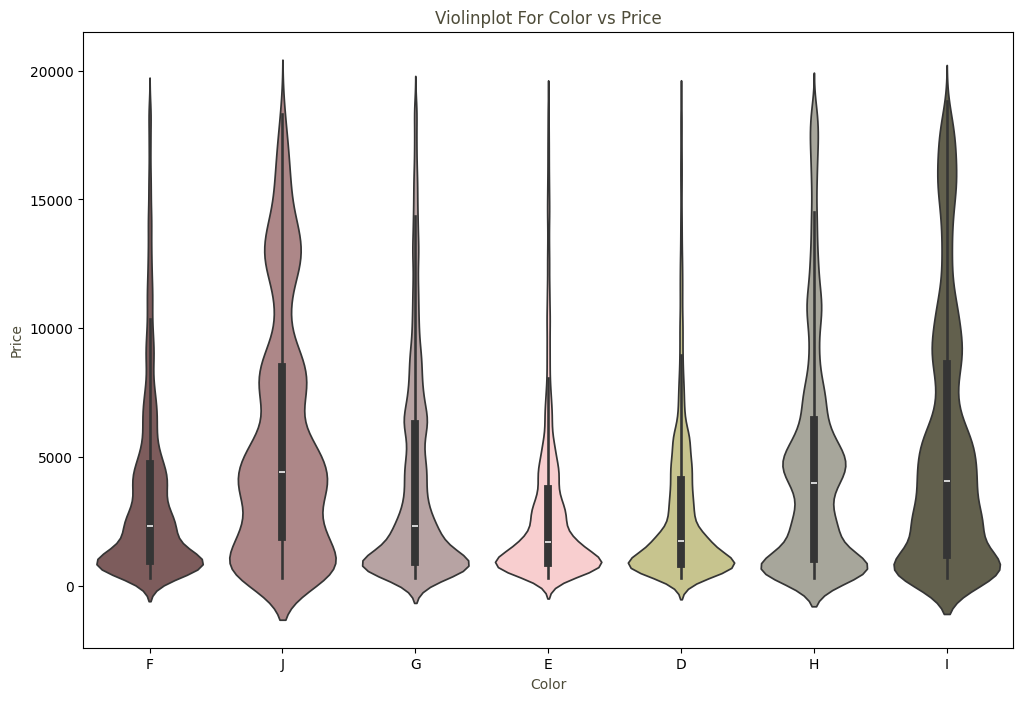

In [18]:
plt.figure(figsize=(12,8))
shade_1 = ["#835656","#b38182", "#baa0a0","#ffc7c8","#d0cd85", "#a9a799", "#65634a"]
ax = sns.violinplot(x="color",y="price", data=df, palette=shade_1,scale= "count")
ax.set_title("Violinplot For Color vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Color", color="#4e4c39")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15220\1758468656.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="clarity",y="price", data=df, palette=shade_2,scale= "count")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15220\1758468656.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x="clarity",y="price", data=df, palette=shade_2,scale= "count")


Text(0.5, 0, 'Clarity')

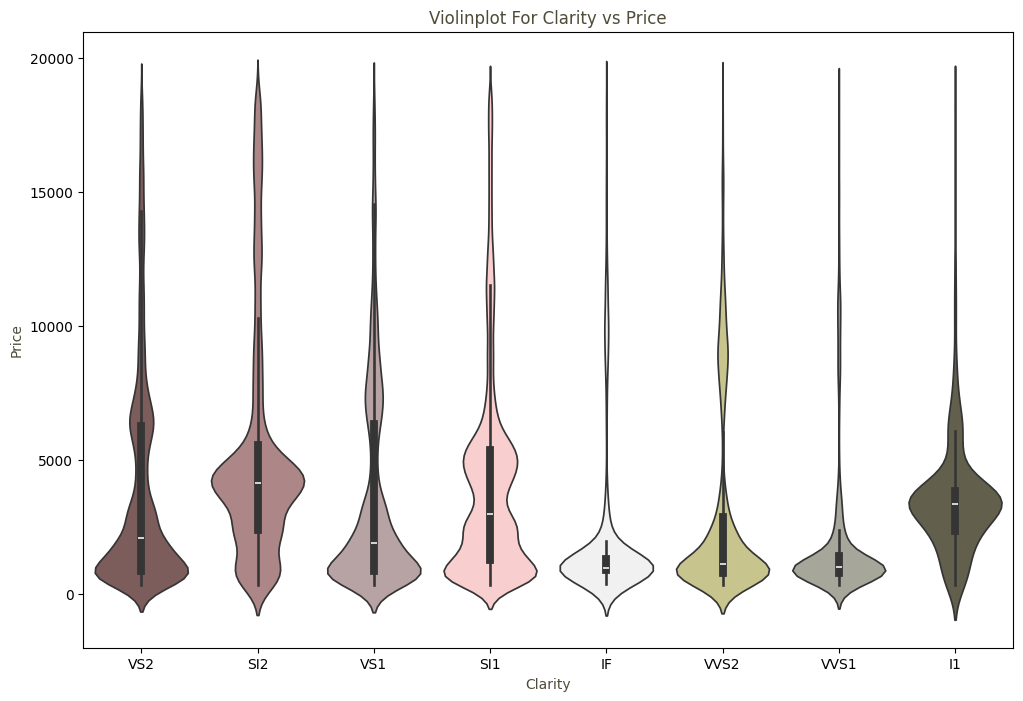

In [19]:
plt.figure(figsize=(12,8))
shade_2 = ["#835656","#b38182", "#baa0a0","#ffc7c8","#f1f1f1","#d0cd85", "#a9a799", "#65634a"]
ax = sns.violinplot(x="clarity",y="price", data=df, palette=shade_2,scale= "count")
ax.set_title("Violinplot For Clarity vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Clarity", color="#4e4c39")

Text(0, 0.5, 'Frequency')

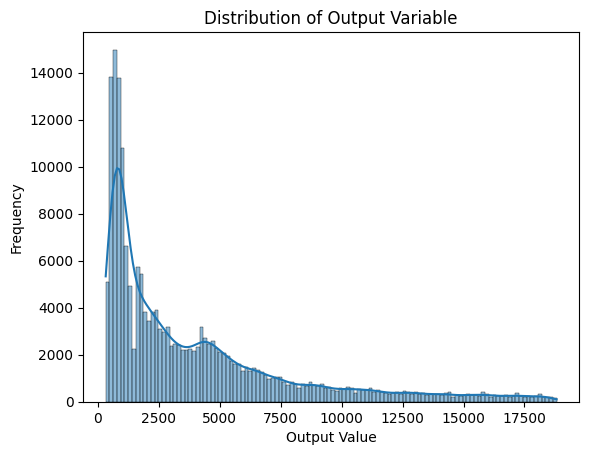

In [20]:
sns.histplot(df['price'], kde=True)  # kde=True adds a kernel density estimate line
plt.title('Distribution of Output Variable')
plt.xlabel('Output Value')
plt.ylabel('Frequency')

Optimal Lambda: -0.06594032625599396


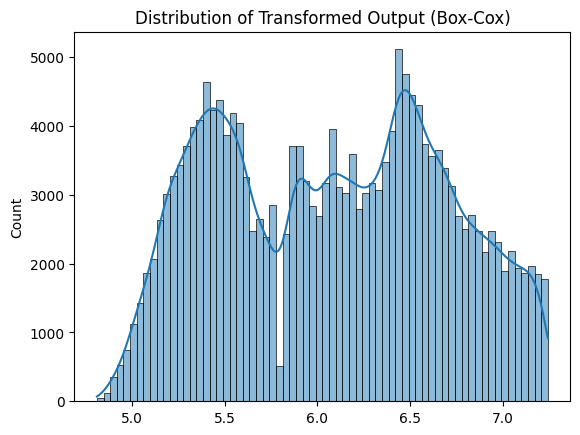

In [21]:


# Example data: Let's say 'output' is the variable you want to transform
data = df['price']  # Replace with your actual data

# Apply the Box-Cox transformation
# Adding 1 to avoid issues with zero values (since Box-Cox requires strictly positive data)
data_transformed, lambda_val = stats.boxcox(data + 1)

# Print the optimal lambda value
print(f'Optimal Lambda: {lambda_val}')

# Plot the transformed data to check if it looks more normally distributed
sns.histplot(data_transformed, kde=True)
plt.title('Distribution of Transformed Output (Box-Cox)')
plt.show()


In [22]:
df['price_transformed'] = (df['price']**lambda_val - 1) / lambda_val


Lable encoding the data to get rid of object dtype.

In [23]:
# Make copy to avoid changing original data 
label_data = df.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

carat  cut  color  clarity  depth  table     x     y     z  price  \
0   1.52    3      2        5   62.2   58.0  7.27  7.33  4.55  13619   
1   2.03    4      6        3   62.0   58.0  8.06  8.12  5.05  13387   
2   0.70    2      3        4   61.2   57.0  5.69  5.73  3.50   2772   
3   0.32    2      3        4   61.6   56.0  4.38  4.41  2.71    666   
4   1.70    3      3        5   62.6   59.0  7.65  7.61  4.77  14453   

   price_transformed  
0           7.069758  
1           7.060580  
2           6.173771  
3           5.287248  
4           7.101424

In [24]:
df=label_data

In [25]:
df.describe()

carat            cut          color        clarity  \
count  193561.000000  193561.000000  193561.000000  193561.000000   
mean        0.790645       2.565042       2.516111       3.818373   
std         0.462636       0.903677       1.623092       1.632311   
min         0.200000       0.000000       0.000000       0.000000   
25%         0.400000       2.000000       1.000000       2.000000   
50%         0.700000       2.000000       3.000000       4.000000   
75%         1.030000       3.000000       4.000000       5.000000   
max         3.500000       4.000000       6.000000       7.000000   

               depth          table             x              y  \
count  193561.000000  193561.000000  193561.00000  193561.000000   
mean       61.820611      57.227544       5.71531       5.720060   
std         1.081663       1.918796       1.10912       1.102107   
min        52.100000      49.000000       3.75000       3.710000   
25%        61.300000      56.000000       4.70000       4.710000   
50%        61.900000      57.000000       5.70000       5.720000   
75%        62.400000      58.000000       6.51000       6.510000   
max        71.600000      79.000000       9.65000      10.010000   

                   z          price  price_transformed  
count  193561.000000  193561.000000      193561.000000  
mean        3.534298    3968.865743           6.072285  
std         0.685553    4034.036127           0.609285  
min         2.240000     326.000000           4.810789  
25%         2.900000     950.000000           5.515904  
50%         3.530000    2401.000000           6.088176  
75%         4.030000    5408.000000           6.561408  
max         8.400000   18818.000000           7.240539

In [ ]:
ax=sns.pairplot(df, hue= "cut",palette=shade)

KeyboardInterrupt: 

<Axes: >

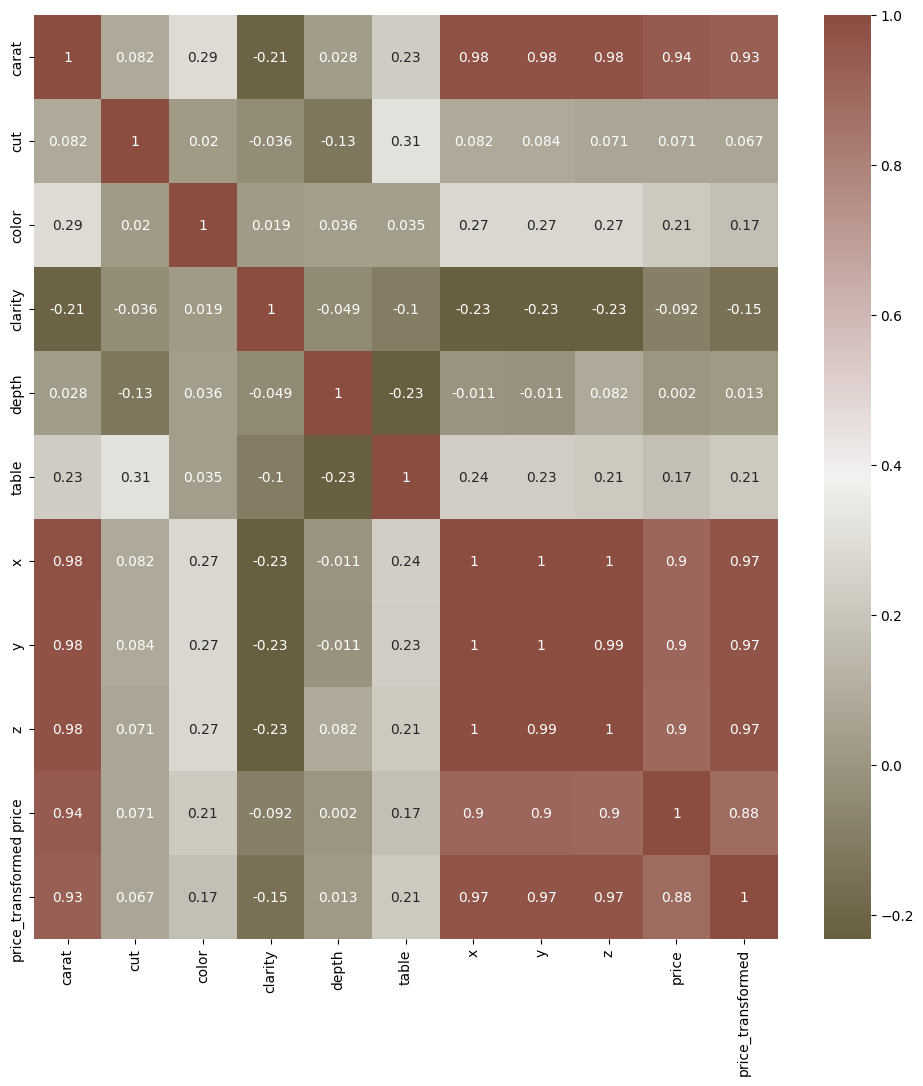

In [26]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

**Points to notice:**
* "x", "y" and "z" show a high correlation to the target column. 
* "depth", "cut" and "table" show low correlation. We could consider dropping but let's keep it. 

In [27]:
df.dtypes

carat                float64
cut                    int32
color                  int32
clarity                int32
depth                float64
table                float64
x                    float64
y                    float64
z                    float64
price                  int64
price_transformed    float64
dtype: object

In [28]:
df['cut']=df['cut'].astype(int)
df['clarity'] = df['clarity'].astype(int)
df['color'] = df['color'].astype(int)

In [33]:
# Assuming df is your DataFrame and 'price' is the target variable
features = df.drop(columns=['price','x','y','z','price_transformed'])

# Add constant term to the feature set
features_with_const = add_constant(features)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = features_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(features_with_const.values, i) for i in range(features_with_const.shape[1])]

print(vif_data)

   feature          VIF
0    const  5418.296024
1    carat     1.208292
2      cut     1.112606
3    color     1.103264
4  clarity     1.061107
5    depth     1.072316
6    table     1.223398


removed x, y, z because of mulcollinearity

In [35]:
df_new = df.drop(columns=['y','x','z','price'])
df_new

carat  cut  color  clarity  depth  table  price_transformed
0        1.52    3      2        5   62.2   58.0           7.069758
1        2.03    4      6        3   62.0   58.0           7.060580
2        0.70    2      3        4   61.2   57.0           6.173771
3        0.32    2      3        4   61.6   56.0           5.287248
4        1.70    3      3        5   62.6   59.0           7.101424
...       ...  ...    ...      ...    ...    ...                ...
193568   0.31    2      0        7   61.1   56.0           5.625676
193569   0.70    3      3        7   60.3   58.0           6.195171
193570   0.73    4      2        2   63.1   57.0           6.227547
193571   0.34    4      0        2   62.9   55.0           5.301745
193572   0.71    1      1        3   60.8   64.0           6.051348

[193561 rows x 7 columns]

In [36]:
## Independent and dependent features
X = features = df.drop(columns=['price', 'x','y','z','price_transformed'], axis = 1)
Y = df['price_transformed']

In [37]:
## Numerical Pipeline
preprocessor=Pipeline(
    steps=[
    ('scaler',StandardScaler())
    ]
)

In [38]:
## Train test split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [39]:
#X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
#X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [40]:
X_train.head()

carat  cut  color  clarity  depth  table
118215   0.90    1      3        3   61.8   58.0
75682    1.70    4      3        5   62.2   58.0
70496    1.11    2      5        2   62.2   55.0
99047    0.32    2      3        1   61.8   55.0
8153     1.01    3      2        3   61.9   58.0

In [41]:
y_train

118215    6.316121
75682     7.141081
70496     6.495381
99047     5.494077
8153      6.382484
            ...   
66457     5.466353
46222     5.228798
98809     5.359124
48047     5.579375
169775    5.774806
Name: price_transformed, Length: 135492, dtype: float64

In [42]:
n = len(X_test)
p = 6

In [43]:
l_regression=LinearRegression()
l_regression.fit(X_train,y_train)

LinearRegression()

In [44]:
l_regression.coef_

array([ 1.28364932e+00, -7.20223750e-03, -4.14552871e-02,  1.96394138e-02,
       -4.71351109e-03,  1.00030810e-03])

In [45]:
l_regression.intercept_

5.33914200220317

In [46]:
predicted_values = l_regression.predict(X)

In [47]:
predicted_values

array([7.04880624, 7.49210788, 5.94603453, ..., 5.96336033, 5.54458975,
       6.03823198])

In [48]:
residuals = Y - predicted_values

In [49]:
residuals

0         0.020951
1        -0.431527
2         0.227737
3        -0.168114
4        -0.136099
            ...   
193568   -0.002490
193569    0.192178
193570    0.264187
193571   -0.242845
193572    0.013116
Name: price_transformed, Length: 193561, dtype: float64

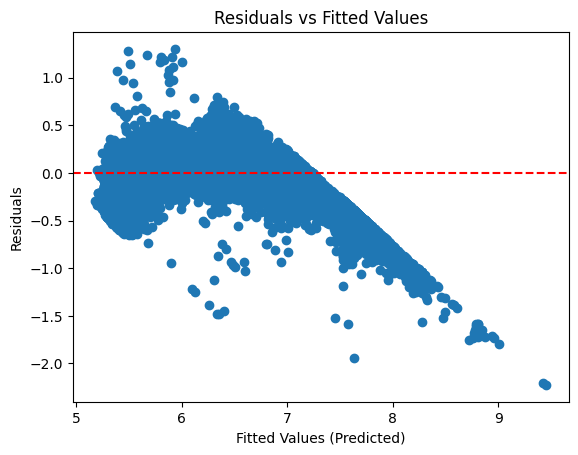

In [50]:
# Plot the fitted values vs. residuals
plt.scatter(predicted_values, residuals)
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at 0 for reference
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [134]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [135]:
## Train multiple models
## Model Ecaluation
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square, =evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)
    print("Adjusted R2 score", 1 - (1 - r2_square) * ((n - 1) / (n - p - 1)))

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 1207.7164367752212
MAE: 869.6133666085614
R2 score 91.00120831288012
Adjusted R2 score 0.9100027839744278


Lasso
Model Training Performance
RMSE: 1207.7236590184173
MAE: 869.1420506077928
R2 score 91.00110068553585
Adjusted R2 score 0.9100017075897654


Ridge
Model Training Performance
RMSE: 1207.716123867908
MAE: 869.5881022319008
R2 score 91.00121297587431
Adjusted R2 score 0.9100028306091884


Elasticnet
Model Training Performance
RMSE: 2954.2477446312755
MAE: 2147.5439644393755
R2 score 46.15466667753181
Adjusted R2 score 0.46149102418637267




In [103]:
model_list

['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet']